# Learning TikZ

TikZ is a powerful tool that can be used to make beautiful pictures. However, there is a steep learning curve to get very good at TikZ. In this article, I note down everything I learn about TikZ

> Editing tikz code cells is **not** yet supported in this website. Its a work in progress!

```{admonition} Warning
:class: warning
This article might be too long when its finished. Feel free to skip through sections using navigation the right side.
```

## Resources used

- [TikZ and PGF manual](https://pgf-tikz.github.io/pgf/pgfmanual.pdf) (1300+ pages 😱!!!) (Most of this article's content will be from here).
- [TikZ net topics](https://tikz.net/topics/)
- [TikZ.dev](https://tikz.dev/)
- [Texample](https://texample.net//tikz/examples/)
- [TikZ websites](https://tikz.org/websites/)

## What is TikZ and what can it do?

In [9]:
%%tikz -as=f
\documentclass{standalone}
\usepackage{pgfplots}

\begin{document}
\begin{tikzpicture}

\begin{axis}[ domain=-5:5, domain y=-5:5, title=Basic surface plot ]
    \addplot3[surf,samples=25] { x^2+y^2 };
\end{axis}

\end{tikzpicture}

\begin{tikzpicture}
\begin{axis}[ domain=-5:5, domain y=-5:5 ]
  \addplot3[
      surf,
      opacity=0.5,
      samples=40
    ] {sin(deg(x))*sin(deg(y))};
\end{axis}


\end{tikzpicture}

\begin{tikzpicture}

\begin{axis}[ domain=-5:5, domain y=-5:5, title=Mesh ]
    \addplot3[ mesh, samples=25 ] { x^2*y };
\end{axis}

\end{tikzpicture}


\begin{tikzpicture}

\begin{axis}[
    title=No axes and custom colormap plus many samples,
    hide axis,
    mesh/interior colormap = {purpleyellow}{color=(purple) color=(yellow)},
    colormap/blackwhite
  ]
  \addplot3[domain=-2:2,surf,samples=50] {-exp(-x^2-y^2)};
\end{axis}

\end{tikzpicture}

\begin{tikzpicture}

\begin{axis}[
    title=Filled background and full grid,
     axis background/.style={fill=green!10},
     3d box=complete*,
     grid=major,
     colorbar % show key
  ]
  \addplot3[surf] {{sin(deg(x)) * y*(1-y)}};
\end{axis}

\end{tikzpicture}

\end{document}

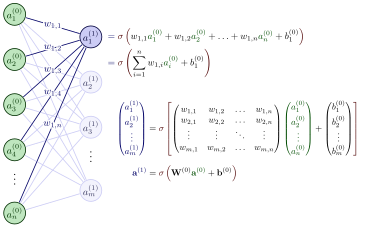

In [8]:
%%tikz -as=f
\documentclass[border=3pt,tikz]{standalone}
\usepackage{amsmath} % for aligned
\usepackage{listofitems} % for \readlist to create arrays
\usetikzlibrary{arrows.meta} % for arrow size
\usepackage[outline]{contour} % glow around text
\contourlength{1.4pt}

% COLORS
\usepackage{xcolor}
\colorlet{myred}{red!80!black}
\colorlet{myblue}{blue!80!black}
\colorlet{mygreen}{green!60!black}
\colorlet{myorange}{orange!70!red!60!black}
\colorlet{mydarkred}{red!30!black}
\colorlet{mydarkblue}{blue!40!black}
\colorlet{mydarkgreen}{green!30!black}

% STYLES
\tikzset{
  >=latex, % for default LaTeX arrow head
  node/.style={thick,circle,draw=myblue,minimum size=22,inner sep=0.5,outer sep=0.6},
  node in/.style={node,green!20!black,draw=mygreen!30!black,fill=mygreen!25},
  node hidden/.style={node,blue!20!black,draw=myblue!30!black,fill=myblue!20},
  node convol/.style={node,orange!20!black,draw=myorange!30!black,fill=myorange!20},
  node out/.style={node,red!20!black,draw=myred!30!black,fill=myred!20},
  connect/.style={thick,mydarkblue}, %,line cap=round
  connect arrow/.style={-{Latex[length=4,width=3.5]},thick,mydarkblue,shorten <=0.5,shorten >=1},
  node 1/.style={node in}, % node styles, numbered for easy mapping with \nstyle
  node 2/.style={node hidden},
  node 3/.style={node out}
}
\def\nstyle{int(\lay<\Nnodlen?min(2,\lay):3)} % map layer number onto 1, 2, or 3

\begin{document}
\begin{tikzpicture}[x=2.7cm,y=1.6cm]
  \message{^^JNeural network activation}
  \def\NI{5} % number of nodes in input layers
  \def\NO{4} % number of nodes in output layers
  \def\yshift{0.4} % shift last node for dots
  
  % INPUT LAYER
  \foreach \i [evaluate={\c=int(\i==\NI); \y=\NI/2-\i-\c*\yshift; \index=(\i<\NI?int(\i):"n");}]
              in {1,...,\NI}{ % loop over nodes
    \node[node in,outer sep=0.6] (NI-\i) at (0,\y) {$a_{\index}^{(0)}$};
  }
  
  % OUTPUT LAYER
  \foreach \i [evaluate={\c=int(\i==\NO); \y=\NO/2-\i-\c*\yshift; \index=(\i<\NO?int(\i):"m");}]
    in {\NO,...,1}{ % loop over nodes
    \ifnum\i=1 % high-lighted node
      \node[node hidden]
        (NO-\i) at (1,\y) {$a_{\index}^{(1)}$};
      \foreach \j [evaluate={\index=(\j<\NI?int(\j):"n");}] in {1,...,\NI}{ % loop over nodes in previous layer
        \draw[connect,white,line width=1.2] (NI-\j) -- (NO-\i);
        \draw[connect] (NI-\j) -- (NO-\i)
          node[pos=0.50] {\contour{white}{$w_{1,\index}$}};
      }
    \else % other light-colored nodes
      \node[node,blue!20!black!80,draw=myblue!20,fill=myblue!5]
        (NO-\i) at (1,\y) {$a_{\index}^{(1)}$};
      \foreach \j in {1,...,\NI}{ % loop over nodes in previous layer
        %\draw[connect,white,line width=1.2] (NI-\j) -- (NO-\i);
        \draw[connect,myblue!20] (NI-\j) -- (NO-\i);
      }
    \fi
  }
  
  % DOTS
  \path (NI-\NI) --++ (0,1+\yshift) node[midway,scale=1.2] {$\vdots$};
  \path (NO-\NO) --++ (0,1+\yshift) node[midway,scale=1.2] {$\vdots$};
  
  % EQUATIONS
  \def\agr#1{{\color{mydarkgreen}a_{#1}^{(0)}}} % green a_i^j
  \node[below=16,right=11,mydarkblue,scale=0.95] at (NO-1)
    {$\begin{aligned} %\underset{\text{bias}}{b_1}
       &= \color{mydarkred}\sigma\left( \color{black}
            w_{1,1}\agr{1} + w_{1,2}\agr{2} + \ldots + w_{1,n}\agr{n} + b_1^{(0)}
          \color{mydarkred}\right)\\
       &= \color{mydarkred}\sigma\left( \color{black}
            \sum_{i=1}^{n} w_{1,i}\agr{i} + b_1^{(0)}
           \color{mydarkred}\right)
     \end{aligned}$};
  \node[right,scale=0.9] at (1.3,-1.3)
    {$\begin{aligned}
      {\color{mydarkblue}
      \begin{pmatrix}
        a_{1}^{(1)} \\[0.3em]
        a_{2}^{(1)} \\
        \vdots \\
        a_{m}^{(1)}
      \end{pmatrix}}
      &=
      \color{mydarkred}\sigma\left[ \color{black}
      \begin{pmatrix}
        w_{1,1} & w_{1,2} & \ldots & w_{1,n} \\
        w_{2,1} & w_{2,2} & \ldots & w_{2,n} \\
        \vdots  & \vdots  & \ddots & \vdots  \\
        w_{m,1} & w_{m,2} & \ldots & w_{m,n}
      \end{pmatrix}
      {\color{mydarkgreen}
      \begin{pmatrix}
        a_{1}^{(0)} \\[0.3em]
        a_{2}^{(0)} \\
        \vdots \\
        a_{n}^{(0)}
      \end{pmatrix}}
      +
      \begin{pmatrix}
        b_{1}^{(0)} \\[0.3em]
        b_{2}^{(0)} \\
        \vdots \\
        b_{m}^{(0)}
      \end{pmatrix}
      \color{mydarkred}\right]\\[0.5em]
      {\color{mydarkblue}\mathbf{a}^{(1)}} % vector (bold)
      &= \color{mydarkred}\sigma\left( \color{black}
           \mathbf{W}^{(0)} {\color{mydarkgreen}\mathbf{a}^{(0)}}+\mathbf{b}^{(0)}
         \color{mydarkred}\right)
    \end{aligned}$};
  
\end{tikzpicture}
\end{document}

Animations are also supported in TikZ:
![](../_static/media/animation.gif)